Beatriz Campoas de Almeida de Castro Monteiro, NUSP: 9778619

# SCC0270 - Redes Neurais e Aprendizado Profundo

# Trabalho 2

In [4]:
import numpy as np
import pandas as pd

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

## Questão 1

In [5]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [65]:
model = Sequential()

In [66]:
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
          
model.add(Dense(10)) #, activation='softmax'))

In [67]:
#model.build(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 32)         

## Questão 2

### a)

In [9]:
#READING CIFAR 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [11]:
y_train = y_train.reshape(50000, )
y_test = y_test.reshape(10000, )

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

### b)

In [13]:
import scipy.io

In [14]:
matTrain = scipy.io.loadmat('train_32x32.mat')
matTest = scipy.io.loadmat('test_32x32.mat')

In [15]:
matTrain.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [16]:
Mx_train = matTrain['X']
My_train = matTrain['y']

Mx_train = np.moveaxis(Mx_train, [3], [0])
My_train = My_train.reshape(73257, )

Mx_train.shape, My_train.shape

((73257, 32, 32, 3), (73257,))

In [17]:
Mx_test = matTest['X']
My_test = matTest['y']

Mx_test = np.moveaxis(Mx_test, [3], [0])
My_test = My_test.reshape(26032, )

Mx_test.shape, My_test.shape

((26032, 32, 32, 3), (26032,))

### c)

In [18]:
print(type(x_train[0][0][0][0]))

print(x_train.min(), x_train.max(), x_test.min(), x_test.max())

x_train = x_train/255
x_test = x_test/255

print(type(x_train[0][0][0][0]))

<class 'numpy.uint8'>
0 255 0 255
<class 'numpy.float64'>


In [19]:
print(x_train.min(), x_train.max(), x_test.min(), x_test.max())

x_train = x_train.astype(np.float16)
x_test = x_test.astype(np.float16)

print(type(x_train[0][0][0][0]))

0.0 1.0 0.0 1.0
<class 'numpy.float16'>


In [20]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

print(type(y_train[0]))

<class 'numpy.uint8'>


In [21]:
print(Mx_train.min(), Mx_train.max(), Mx_test.min(), Mx_test.max())

Mx_train = Mx_train/255
Mx_test = Mx_test/255

Mx_train = Mx_train.astype(np.float16)
Mx_test = Mx_test.astype(np.float16)

print(type(Mx_train[0][0][0][0]))
Mx_train.min(), Mx_train.max(), Mx_test.min(), Mx_test.max()

0 255 0 255
<class 'numpy.float16'>


(0.0, 1.0, 0.0, 1.0)

In [22]:
My_train = My_train.astype(np.uint8)
My_test = My_test.astype(np.uint8)

print(type(My_train[0]))

<class 'numpy.uint8'>


### d)

CIFAR 10

Número de Imagens de Treino:  50000
Número de Imagens de Teste:  10000
Número de linhas, colunas e canais das imagens, respectivamente:  (32, 32, 3)


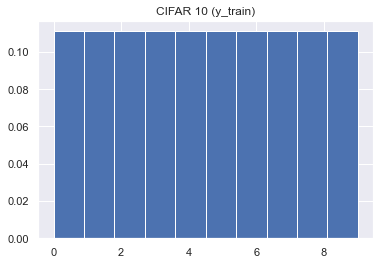

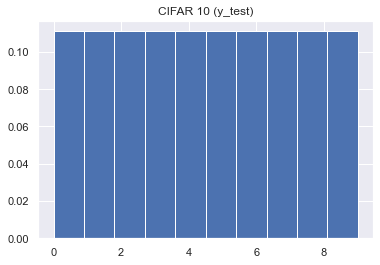

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("CIFAR 10\n")

print("Número de Imagens de Treino: ", x_train.shape[0])
print("Número de Imagens de Teste: ", x_test.shape[0])

print("Número de linhas, colunas e canais das imagens, respectivamente: ", x_train.shape[1:])

sns.set()

plt.hist(y_train, density=True)
plt.title("CIFAR 10 (y_train)")
plt.show()

plt.hist(y_test, density=True)
plt.title("CIFAR 10 (y_test)")
plt.show()


SVHN

Número de Imagens de Treino:  73257
Número de Imagens de Teste:  26032
Número de linhas, colunas e canais das imagens, respectivamente:  (32, 32, 3)


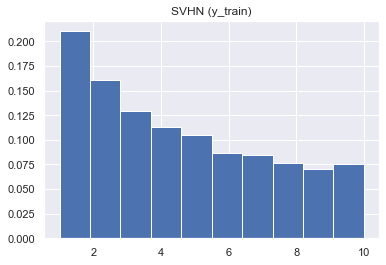

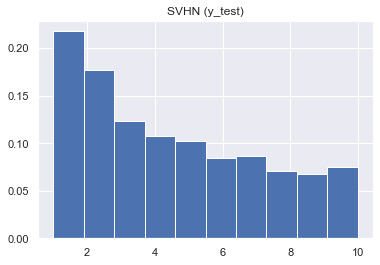

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

print("SVHN\n")

print("Número de Imagens de Treino: ", Mx_train.shape[0])
print("Número de Imagens de Teste: ", Mx_test.shape[0])

print("Número de linhas, colunas e canais das imagens, respectivamente: ", Mx_train.shape[1:])

sns.set()

plt.hist(My_train, density=True)
plt.title("SVHN (y_train)")
plt.show()

plt.hist(My_test, density=True)
plt.title("SVHN (y_test)")
plt.show()

## Questão 3

In [25]:
from skimage.util import random_noise

In [32]:
#CIFAR 10

#GAUSS VAR=0.01
x_train_g01 = random_noise(x_train, mode='gaussian', var=0.01)
x_train_g01 = x_train_g01.astype(np.float16)

x_test_g01 = random_noise(x_test, mode='gaussian', var=0.01)
x_test_g01 = x_test_g01.astype(np.float16)

#GAUSS VAR=0.001
x_train_g001 = random_noise(x_train, mode='gaussian', var=0.001)
x_train_g001 = x_train_g001.astype(np.float16)

x_test_g001 = random_noise(x_test, mode='gaussian', var=0.001)
x_test_g001 = x_test_g001.astype(np.float16)

CIFAR 10 - ORIGINAL


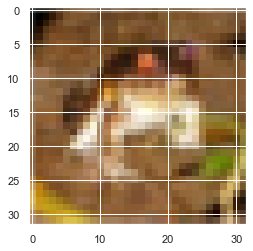

CIFAR 10 - GAUSS VAR=0.001


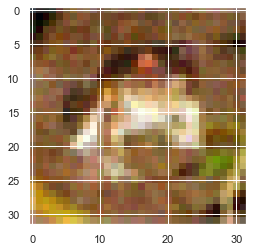

CIFAR 10 - GAUSS VAR=0.01


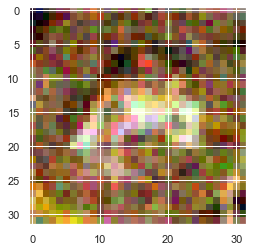

In [33]:
print("CIFAR 10 - ORIGINAL")
plt.imshow(np.float32(x_train[0]))
plt.show()

print("CIFAR 10 - GAUSS VAR=0.001")
plt.imshow(np.float32(x_train_g001[0]))
plt.show()

print("CIFAR 10 - GAUSS VAR=0.01")
plt.imshow(np.float32(x_train_g01[0]))
plt.show()

In [34]:
#SVHN

#GAUSS VAR=0.01
Mx_train_g01 = random_noise(Mx_train, mode='gaussian', var=0.01)
Mx_train_g01 = Mx_train_g01.astype(np.float16)

Mx_test_g01 = random_noise(Mx_test, mode='gaussian', var=0.01)
Mx_test_g01 = Mx_test_g01.astype(np.float16)

#GAUSS VAR=0.001
Mx_train_g001 = random_noise(Mx_train, mode='gaussian', var=0.001)
Mx_train_g001 = Mx_train_g001.astype(np.float16)

Mx_test_g001 = random_noise(Mx_test, mode='gaussian', var=0.001)
Mx_test_g001 = Mx_test_g001.astype(np.float16)

SVHN - ORIGINAL


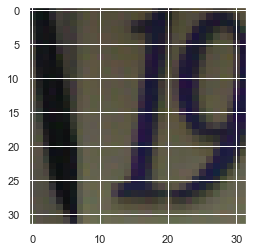

SVHN - GAUSS VAR=0.001


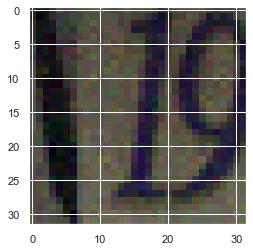

SVHN - GAUSS VAR=0.01


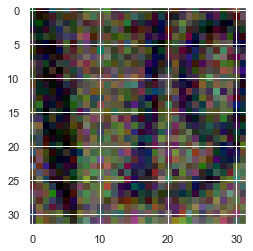

In [35]:
print("SVHN - ORIGINAL")
plt.imshow(np.float32(Mx_train[0]))
plt.show()

print("SVHN - GAUSS VAR=0.001")
plt.imshow(np.float32(Mx_train_g001[0]))
plt.show()

print("SVHN - GAUSS VAR=0.01")
plt.imshow(np.float32(Mx_train_g01[0]))
plt.show()

## Questão 4

In [58]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [72]:
#Cria molde de modelo
model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [80]:
model.save("my_model.h5")

In [61]:
from keras.models import load_model

In [74]:
#CIFAR 10
cifar10_original_model = load_model('my_model.h5')
cifar10_original_model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
cifar10_original_model.fit(x_train, y_train, epochs=10)
cifar10_original_model.save('cifar10_original_model.h5')

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.8003 - accuracy: 0.3407
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2475 - accuracy: 0.5571
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0974 - accuracy: 0.6146
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9931 - accuracy: 0.6485
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9214 - accuracy: 0.6745
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8529 - accuracy: 0.7020
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8100 - accuracy: 0.7158
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7876 - accuracy: 0.7220
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7394 - accuracy: 0.7432
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [76]:
#CIFAR 10 - GAUSS VAR=0.001
cifar10_g001_model = load_model('my_model.h5')
cifar10_g001_model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
cifar10_g001_model.fit(x_train_g001, y_train, epochs=10)
cifar10_g001_model.save('cifar10_g001_model.h5')

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.8380 - accuracy: 0.3232
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3059 - accuracy: 0.5332
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1258 - accuracy: 0.6010
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0217 - accuracy: 0.6418
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9427 - accuracy: 0.6714
Epoch 6/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8909 - accuracy: 0.6873
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8394 - accuracy: 0.7041
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7957 - accuracy: 0.7192
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7667 - accuracy: 0.73020s - loss: 0.7666 - accuracy: 0.
Epoch 10/10
1563/1563 [=========

In [77]:
#CIFAR 10 - GAUSS VAR=0.01
cifar10_g01_model = load_model('my_model.h5')
cifar10_g01_model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
cifar10_g01_model.fit(x_train_g01, y_train, epochs=10)
cifar10_g01_model.save('cifar10_g01_model.h5')

Epoch 1/10
1563/1563 [==============================] - 30s 18ms/step - loss: 1.8483 - accuracy: 0.3231
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3400 - accuracy: 0.5230
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1662 - accuracy: 0.5851
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0907 - accuracy: 0.6121
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0206 - accuracy: 0.6439
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9690 - accuracy: 0.6565
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9327 - accuracy: 0.6722
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8971 - accuracy: 0.6861
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8660 - accuracy: 0.6948
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [91]:
print(Mx_train.min(), Mx_train.max(), My_test.min(), My_test.max())
My_train-1

0.0 1.0 1 10


array([0, 8, 1, ..., 0, 5, 8], dtype=uint8)

In [92]:
#SVHN
SVHN_original_model = load_model('my_model.h5')
SVHN_original_model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
SVHN_original_model.fit(Mx_train, My_train-1, epochs=10)
SVHN_original_model.save('SVHN_original_model.h5')

Epoch 1/10
2290/2290 [==============================] - 40s 17ms/step - loss: 1.5841 - accuracy: 0.4471
Epoch 2/10
2290/2290 [==============================] - 42s 18ms/step - loss: 0.4769 - accuracy: 0.8563
Epoch 3/10
2290/2290 [==============================] - 43s 19ms/step - loss: 0.3793 - accuracy: 0.8864
Epoch 4/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.3362 - accuracy: 0.9014
Epoch 5/10
2290/2290 [==============================] - 43s 19ms/step - loss: 0.3015 - accuracy: 0.9106
Epoch 6/10
2290/2290 [==============================] - 43s 19ms/step - loss: 0.2805 - accuracy: 0.9168
Epoch 7/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.2652 - accuracy: 0.9214
Epoch 8/10
2290/2290 [==============================] - 43s 19ms/step - loss: 0.2452 - accuracy: 0.9271
Epoch 9/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.2373 - accuracy: 0.9297
Epoch 10/10
2290/2290 [==============================] - 40s 18m

In [94]:
#SVHN - GAUSS VAR=0.001
SVHN_g001_model = load_model('my_model.h5')
SVHN_g001_model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
SVHN_g001_model.fit(Mx_train_g001, My_train-1, epochs=10)
SVHN_g001_model.save('SVHN_g001_model.h5')

Epoch 1/10
2290/2290 [==============================] - 37s 16ms/step - loss: 1.4143 - accuracy: 0.5128
Epoch 2/10
2290/2290 [==============================] - 39s 17ms/step - loss: 0.4747 - accuracy: 0.8571
Epoch 3/10
2290/2290 [==============================] - 40s 17ms/step - loss: 0.3779 - accuracy: 0.8881
Epoch 4/10
2290/2290 [==============================] - 40s 18ms/step - loss: 0.3324 - accuracy: 0.9020
Epoch 5/10
2290/2290 [==============================] - 40s 17ms/step - loss: 0.3073 - accuracy: 0.9090
Epoch 6/10
2290/2290 [==============================] - 42s 18ms/step - loss: 0.2852 - accuracy: 0.9146
Epoch 7/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.2648 - accuracy: 0.9212
Epoch 8/10
2290/2290 [==============================] - 40s 18ms/step - loss: 0.2552 - accuracy: 0.9228
Epoch 9/10
2290/2290 [==============================] - 42s 18ms/step - loss: 0.2404 - accuracy: 0.9276
Epoch 10/10
2290/2290 [==============================] - 43s 19m

In [96]:
#SVHN - GAUSS VAR=0.01
SVHN_g01_model = load_model('my_model.h5')
SVHN_g01_model.compile(optimizer="Adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
SVHN_g01_model.fit(Mx_train_g01, My_train-1, epochs=10)
SVHN_g01_model.save('SVHN_g01_model.h5')

Epoch 1/10
2290/2290 [==============================] - 37s 16ms/step - loss: 1.6197 - accuracy: 0.4330
Epoch 2/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.5930 - accuracy: 0.8183
Epoch 3/10
2290/2290 [==============================] - 39s 17ms/step - loss: 0.4937 - accuracy: 0.8490
Epoch 4/10
2290/2290 [==============================] - 40s 17ms/step - loss: 0.4501 - accuracy: 0.8628
Epoch 5/10
2290/2290 [==============================] - 40s 18ms/step - loss: 0.4177 - accuracy: 0.8708
Epoch 6/10
2290/2290 [==============================] - 44s 19ms/step - loss: 0.3895 - accuracy: 0.8805
Epoch 7/10
2290/2290 [==============================] - 42s 18ms/step - loss: 0.3782 - accuracy: 0.8840
Epoch 8/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.3550 - accuracy: 0.8914
Epoch 9/10
2290/2290 [==============================] - 41s 18ms/step - loss: 0.3413 - accuracy: 0.8941
Epoch 10/10
2290/2290 [==============================] - 43s 19m

## Questão 5

## a)

### CIFAR 10 - TREINAMENTO: Base original (sem ruído)

In [101]:
cifar_original = load_model('cifar10_original_model.h5')

print("Resultado da rede na base sem ruídos")
cifar_original.evaluate(x_test, y_test)

print("\nResultado da rede na base com ruído Gauss var=0.001")
cifar_original.evaluate(x_test_g001, y_test)

print("\nResultado da rede na base com ruído Gauss var=0.01")
cifar_original.evaluate(x_test_g01, y_test)

Resultado da rede na base sem ruídos
313/313 [==============================] - 2s 4ms/step - loss: 0.9321 - accuracy: 0.6861

Resultado da rede na base com ruído Gauss var=0.001
313/313 [==============================] - 1s 4ms/step - loss: 0.9930 - accuracy: 0.6651

Resultado da rede na base com ruído Gauss var=0.01
313/313 [==============================] - 1s 4ms/step - loss: 1.7514 - accuracy: 0.4615


[1.7513635158538818, 0.46149998903274536]

### CIFAR 10 - TREINAMENTO: Base com ruído GAUSS VAR=0.001

In [106]:
cifar_g001 = load_model('cifar10_g001_model.h5')

print("Resultado da rede na base sem ruídos")
cifar_g001.evaluate(x_test, y_test)

print("\nResultado da rede na base com ruído Gauss var=0.001")
cifar_g001.evaluate(x_test_g001, y_test)

print("\nResultado da rede na base com ruído Gauss var=0.01")
cifar_g001.evaluate(x_test_g01, y_test)

Resultado da rede na base sem ruídos
313/313 [==============================] - 2s 4ms/step - loss: 0.9198 - accuracy: 0.6850

Resultado da rede na base com ruído Gauss var=0.001
313/313 [==============================] - 1s 4ms/step - loss: 0.9162 - accuracy: 0.6844

Resultado da rede na base com ruído Gauss var=0.01
313/313 [==============================] - 1s 4ms/step - loss: 1.2606 - accuracy: 0.5710


[1.260648488998413, 0.5709999799728394]

### CIFAR 10 - TREINAMENTO: Base com ruído GAUSS VAR=0.01

In [103]:
cifar_g01 = load_model('cifar10_g01_model.h5')

print("Resultado da rede na base sem ruídos")
cifar_g01.evaluate(x_test, y_test)

print("\nResultado da rede na base com ruído Gauss var=0.001")
cifar_g01.evaluate(x_test_g001, y_test)

print("\nResultado da rede na base com ruído Gauss var=0.01")
cifar_g01.evaluate(x_test_g01, y_test)

Resultado da rede na base sem ruídos
313/313 [==============================] - 2s 4ms/step - loss: 1.0400 - accuracy: 0.6444

Resultado da rede na base com ruído Gauss var=0.001
313/313 [==============================] - 1s 4ms/step - loss: 1.0281 - accuracy: 0.6465

Resultado da rede na base com ruído Gauss var=0.01
313/313 [==============================] - 1s 4ms/step - loss: 1.0195 - accuracy: 0.6505


[1.0195074081420898, 0.6504999995231628]

### SVHN - TREINAMENTO: Base original (sem ruído)

In [105]:
SVHN_original = load_model('SVHN_original_model.h5')

print("Resultado da rede na base sem ruídos")
SVHN_original.evaluate(Mx_test, My_test-1)

print("\nResultado da rede na base com ruído Gauss var=0.001")
SVHN_original.evaluate(Mx_test_g001, My_test-1)

print("\nResultado da rede na base com ruído Gauss var=0.01")
SVHN_original.evaluate(Mx_test_g01, My_test-1)

Resultado da rede na base sem ruídos
814/814 [==============================] - 4s 4ms/step - loss: 0.3513 - accuracy: 0.8951

Resultado da rede na base com ruído Gauss var=0.001
814/814 [==============================] - 83s 102ms/step - loss: 0.3870 - accuracy: 0.8844

Resultado da rede na base com ruído Gauss var=0.01
814/814 [==============================] - 3s 4ms/step - loss: 0.7589 - accuracy: 0.7562


[0.7588794231414795, 0.7561846971511841]

### SVHN - TREINAMENTO: Base com ruído GAUSS VAR=0.001

In [111]:
SVHN_g001 = load_model('SVHN_g001_model.h5')

print("Resultado da rede na base sem ruídos")
SVHN_g001.evaluate(Mx_test, My_test-1)

print("\nResultado da rede na base com ruído Gauss var=0.001")
SVHN_g001.evaluate(Mx_test_g001, My_test-1)

print("\nResultado da rede na base com ruído Gauss var=0.01")
SVHN_g001.evaluate(Mx_test_g01, My_test-1)

Resultado da rede na base sem ruídos
814/814 [==============================] - 4s 4ms/step - loss: 0.3626 - accuracy: 0.9038

Resultado da rede na base com ruído Gauss var=0.001
814/814 [==============================] - 3s 4ms/step - loss: 0.3760 - accuracy: 0.9009

Resultado da rede na base com ruído Gauss var=0.01
814/814 [==============================] - 4s 4ms/step - loss: 0.5543 - accuracy: 0.8441


[0.5542868971824646, 0.8440765142440796]

### SVHN - TREINAMENTO: Base com ruído GAUSS VAR=0.01

In [112]:
SVHN_g01 = load_model('SVHN_g01_model.h5')

print("Resultado da rede na base sem ruídos")
SVHN_g01.evaluate(Mx_test, My_test-1)

print("\nResultado da rede na base com ruído Gauss var=0.001")
SVHN_g01.evaluate(Mx_test_g001, My_test-1)

print("\nResultado da rede na base com ruído Gauss var=0.01")
SVHN_g01.evaluate(Mx_test_g01, My_test-1)

Resultado da rede na base sem ruídos
814/814 [==============================] - 4s 4ms/step - loss: 0.4152 - accuracy: 0.8836

Resultado da rede na base com ruído Gauss var=0.001
814/814 [==============================] - 4s 4ms/step - loss: 0.4212 - accuracy: 0.8813

Resultado da rede na base com ruído Gauss var=0.01
814/814 [==============================] - 4s 5ms/step - loss: 0.4959 - accuracy: 0.8569


[0.4958565831184387, 0.8568684458732605]

## b)

Acredito que as duas afirmações sejam complementares, embora a primeira frase não esteja correta. Não acho que o ruído torne o problema em si mais difícil (como escrito na afirmação 1), porém ele dificulta sim a identificação clara da diferença entre os objetos a serem classificados, atrapalando o aprendizado da rede neural. Já a segunda afirmação já possui uma melhor acurácia, uma vez que, de fato, os dados ruidosos são muito diferentes dos apresentados na base de teste. No entanto, é necessário um estudo mais aprofundado para compreender os reais efeitos do ruído nas bases de treino uma vez que, nas bases estudadas, o modelo que obteve o melhor resultado em ambos os datasets foi aquele treinado com Gauss VAR=0.001 e não o com a base original. Dessa forma, é possível que uma base de treino que contenha imagens sem ruído e outras com um ruído leve possa gerar bons resultados,mas, como dito anteriormente, mais testes são necessários para que se possa comprovar tal afirmação. 